In [148]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import calendar

In [149]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [150]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [151]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [152]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [153]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 3.1) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [154]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 3.1) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### Data Point Average of DIC

In [155]:
data_baseline_plot = sliced_data_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = sliced_data_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [156]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

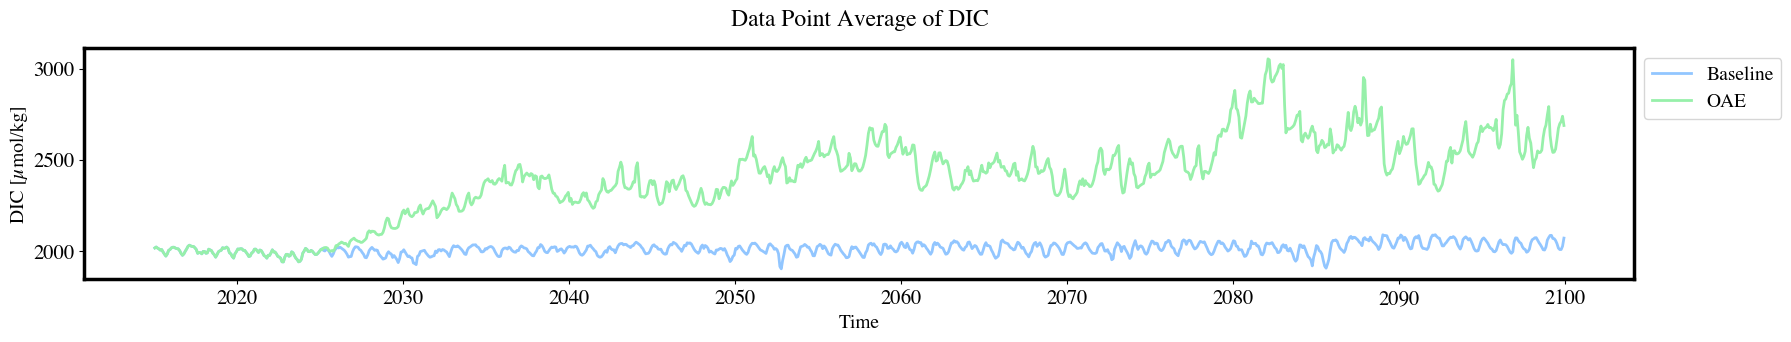

In [157]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of DIC', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [158]:
sliced_frame_baseline_plot = sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [159]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

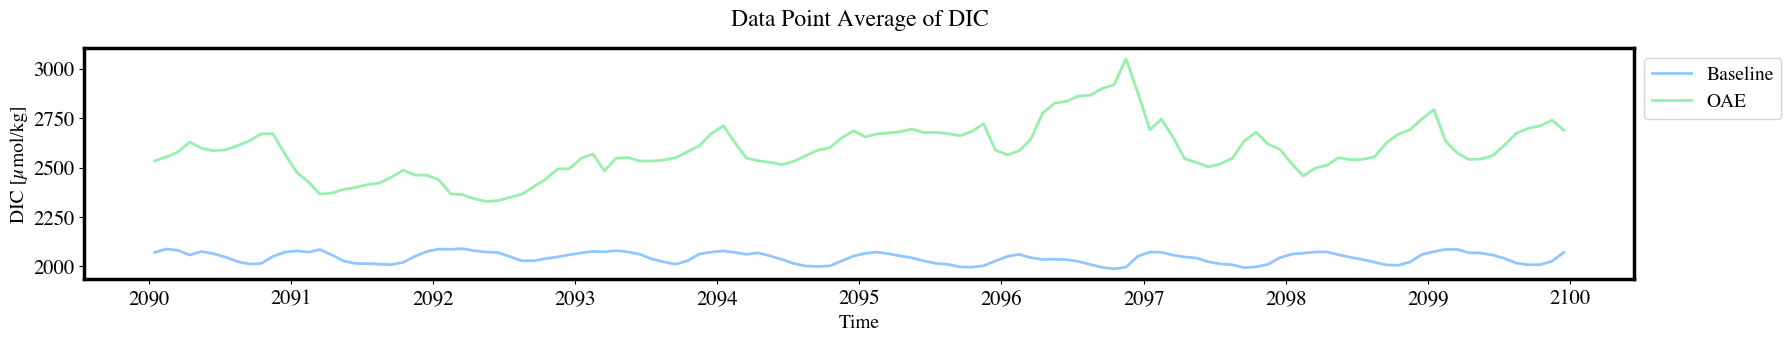

In [160]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of DIC', fontname="Times", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of DIC

In [161]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_baseline = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [162]:
dic_season_mean_all_years_baseline = dic_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_baseline = dic_season_mean_all_years_baseline.mean(["y", "x", "deptht"])

In [163]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_oae = sliced_data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [164]:
dic_season_mean_all_years_oae = dic_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_oae = dic_season_mean_all_years_oae.mean(["y", "x", "deptht"])

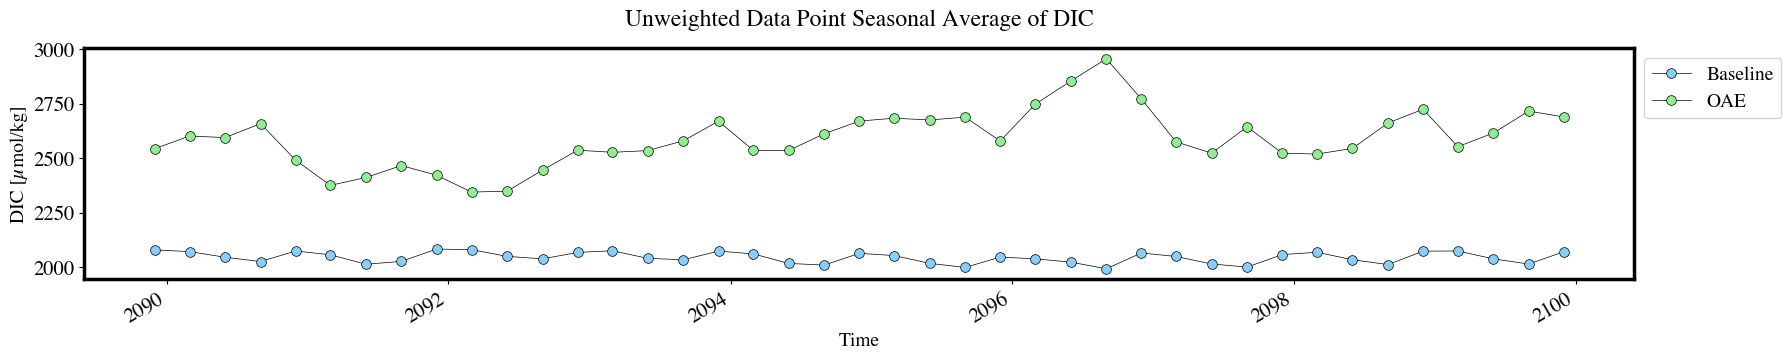

In [165]:
f, ax = plt.subplots(figsize=(20, 3))

dic_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of DIC", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of DIC

In [166]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_baseline = dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)
dic_weighted_season_baseline = dic_weighted_mean_baseline.mean(["y", "x", "deptht"])

In [167]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_oae = dic_weighted_mean_oae.where(dic_weighted_mean_oae)
dic_weighted_season_oae = dic_weighted_mean_oae.mean(["y", "x", "deptht"])

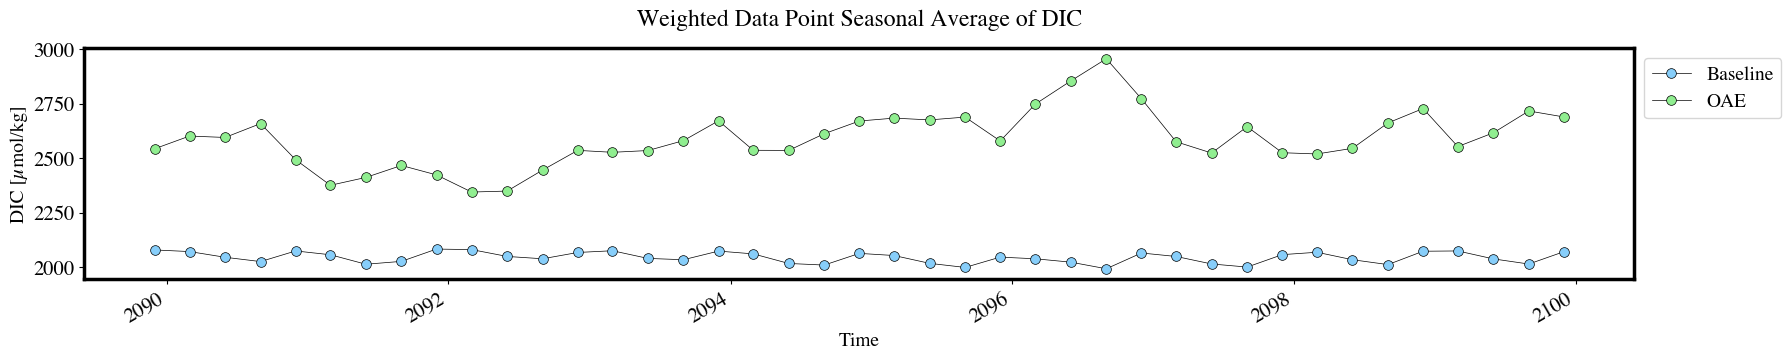

In [168]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of DIC", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of DIC (seasons displayed)

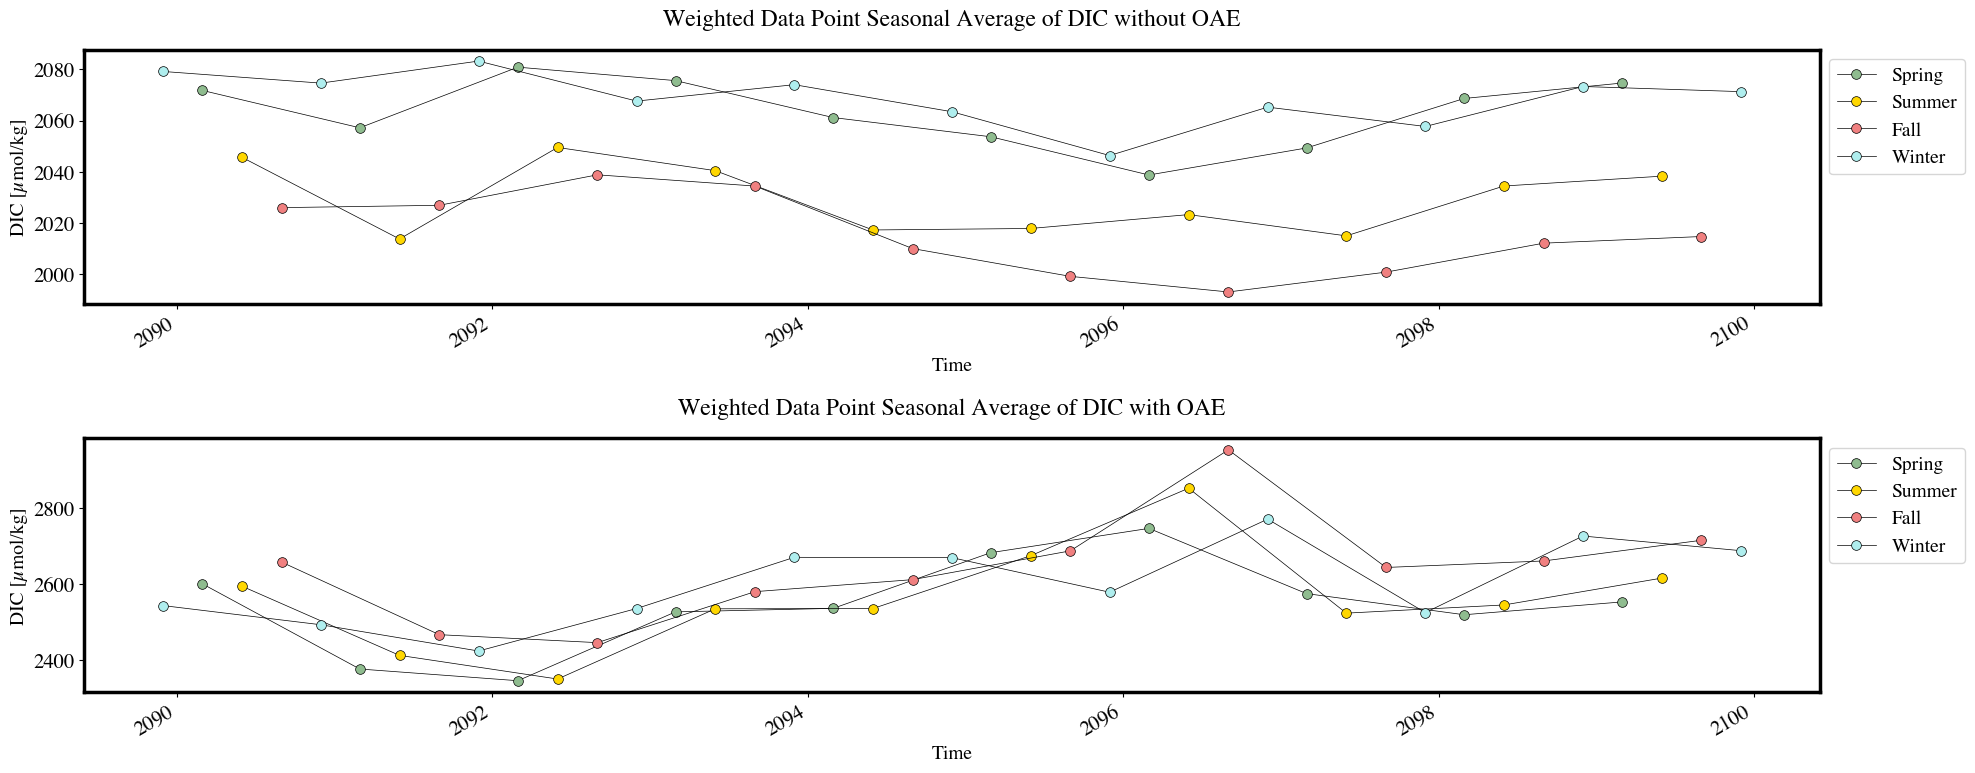

In [169]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of DIC without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC [µmol/kg]', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of DIC with OAE", fontname="Times", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC [µmol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted Data Point Seasonal Average of DIC without OAE (seasons displayed)

In [170]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('DIC_Flux')
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [171]:
conditions = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_baseline['Month'] = np.select(conditions, values)

In [172]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

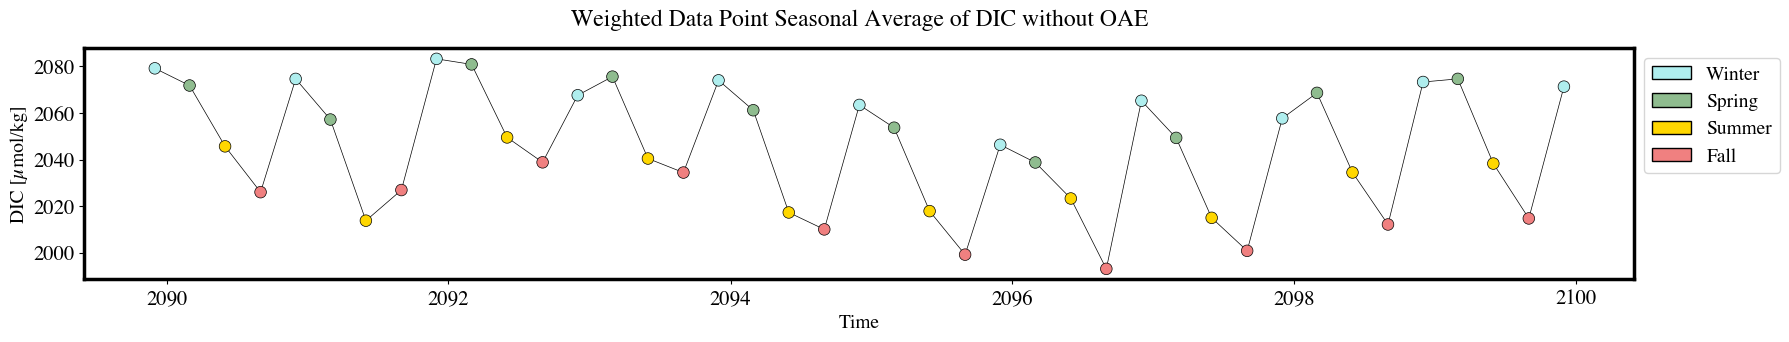

In [173]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of DIC without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of DIC with OAE (seasons displayed)

In [174]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('DIC_Flux')
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [175]:
conditions = [
    (dic_weighted_oae['Month'] == 3),
    (dic_weighted_oae['Month'] == 6),
    (dic_weighted_oae['Month'] == 9),
    (dic_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_oae['Month'] = np.select(conditions, values)

In [176]:
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

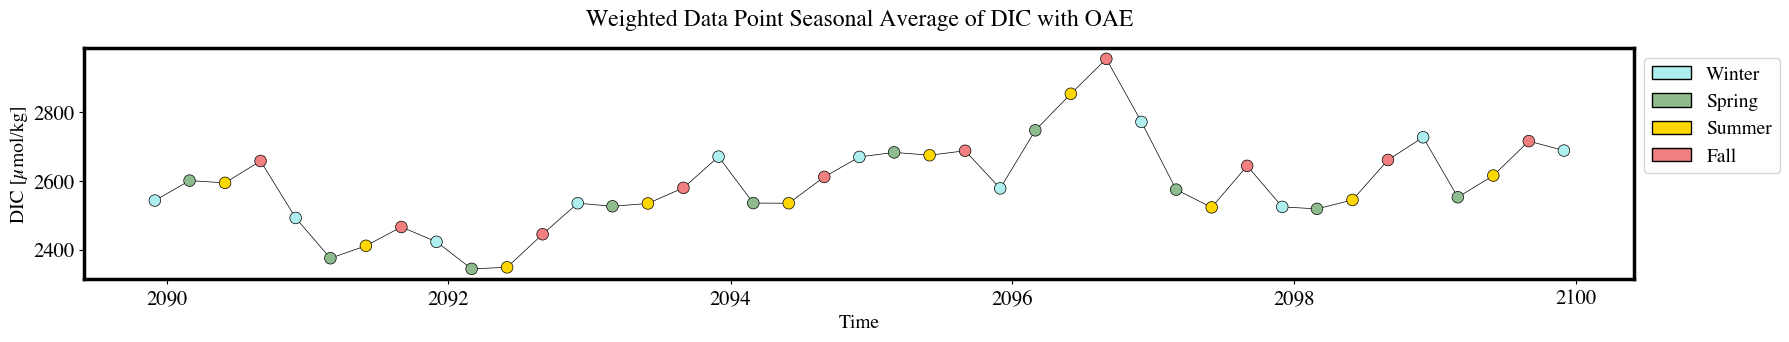

In [177]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of DIC with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of DIC (seasons displayed)

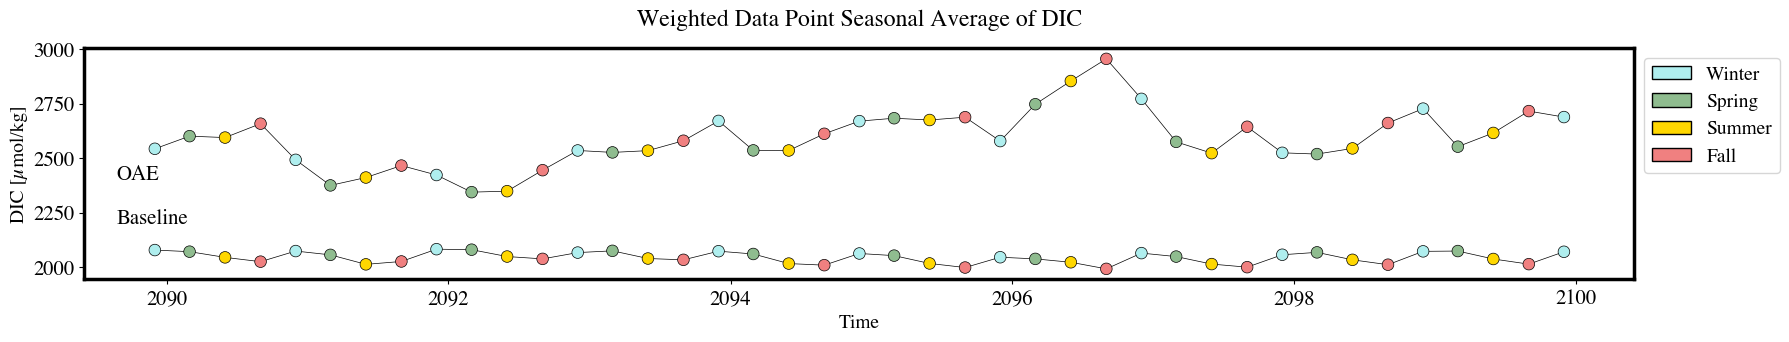

In [178]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43700, 2400, s='OAE')
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2200, s='Baseline')
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of DIC", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of DIC without OAE

In [179]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

dic_baseline_month = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_baseline = dic_baseline_month.mean(["y", "x", "deptht"])

In [180]:
dic_oae_month = sliced_data_oae["DIC"].sel(time_counter=slice(start_date_month, end_date_month))
dic_monthly_mean_oae = dic_oae_month.mean(["y", "x", "deptht"])

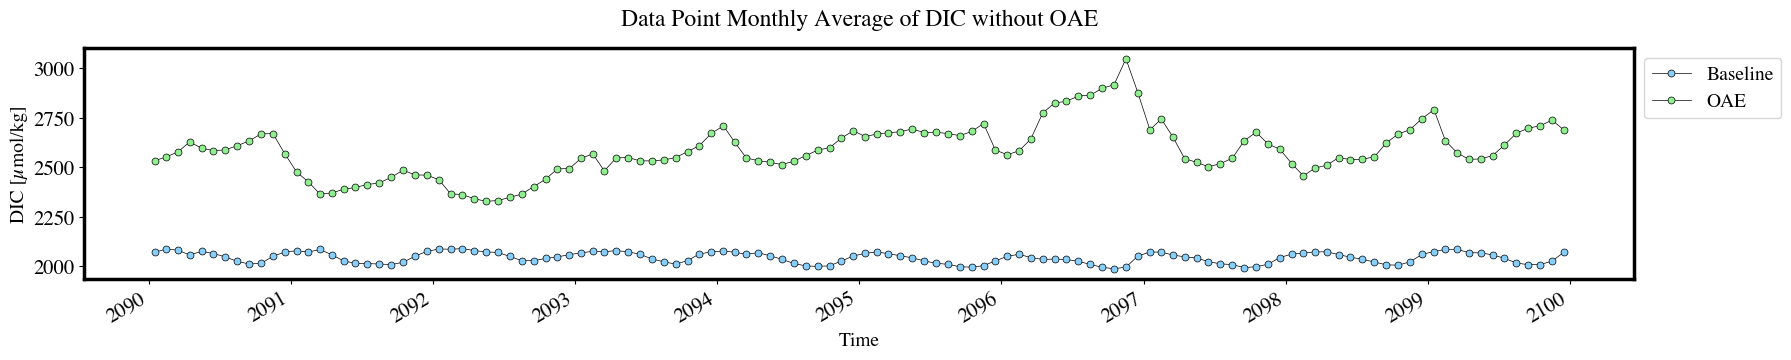

In [181]:
f, ax = plt.subplots(figsize=(20, 3))

dic_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of DIC without OAE", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Data Point Monthly Average of DIC without OAE (months displayed)

In [182]:
dic_baseline_monthly = dic_monthly_mean_baseline.to_dataframe('DIC')
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

In [183]:
conditions = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_monthly['Month'] = np.select(conditions, values)

In [184]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

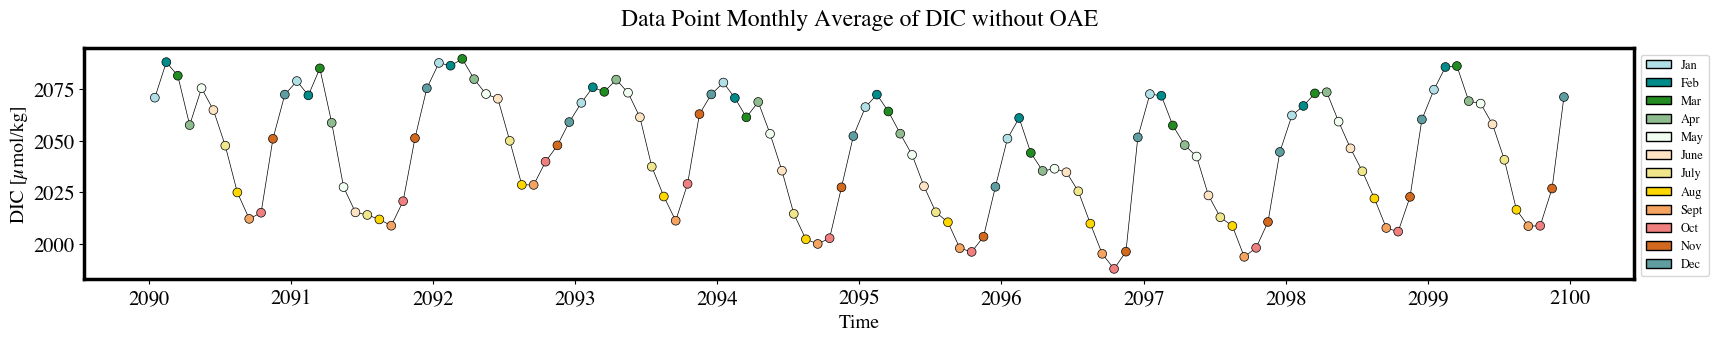

In [185]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of DIC without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of DIC with OAE (months displayed)

In [186]:
dic_oae_monthly = dic_monthly_mean_oae.to_dataframe('DIC')
dic_oae_monthly['Month'] = pd.DatetimeIndex(dic_oae_monthly.index).month

In [187]:
conditions = [
    (dic_oae_monthly['Month'] == 1),
    (dic_oae_monthly['Month'] == 2),
    (dic_oae_monthly['Month'] == 3),
    (dic_oae_monthly['Month'] == 4),
    (dic_oae_monthly['Month'] == 5),
    (dic_oae_monthly['Month'] == 6),
    (dic_oae_monthly['Month'] == 7),
    (dic_oae_monthly['Month'] == 8),
    (dic_oae_monthly['Month'] == 9),
    (dic_oae_monthly['Month'] == 10),
    (dic_oae_monthly['Month'] == 11),
    (dic_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_oae_monthly['Month'] = np.select(conditions, values)

In [188]:
colors = dict(zip(dic_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

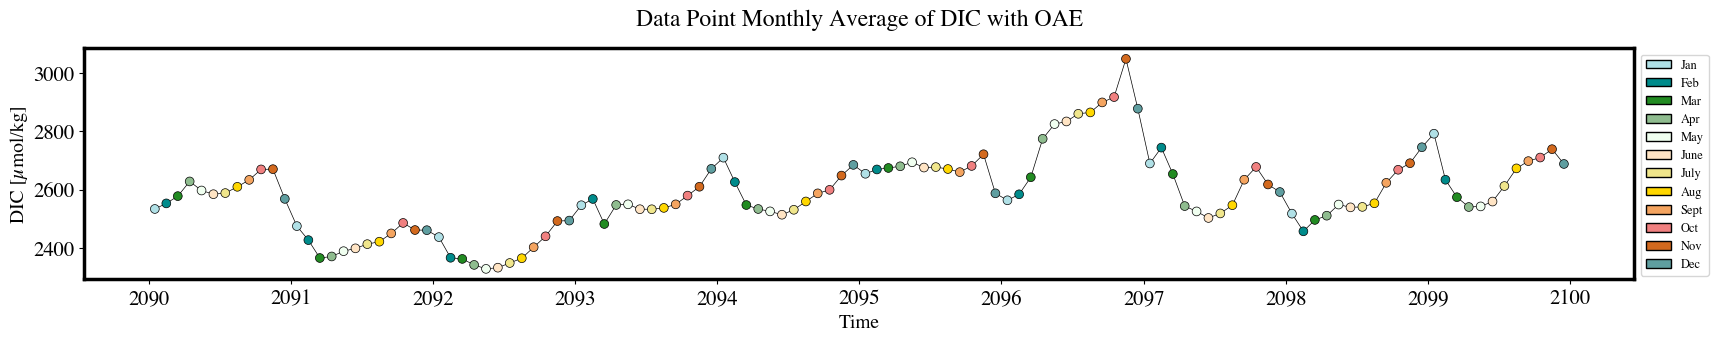

In [189]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.DIC, color=dic_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of DIC with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of DIC (months displayed)

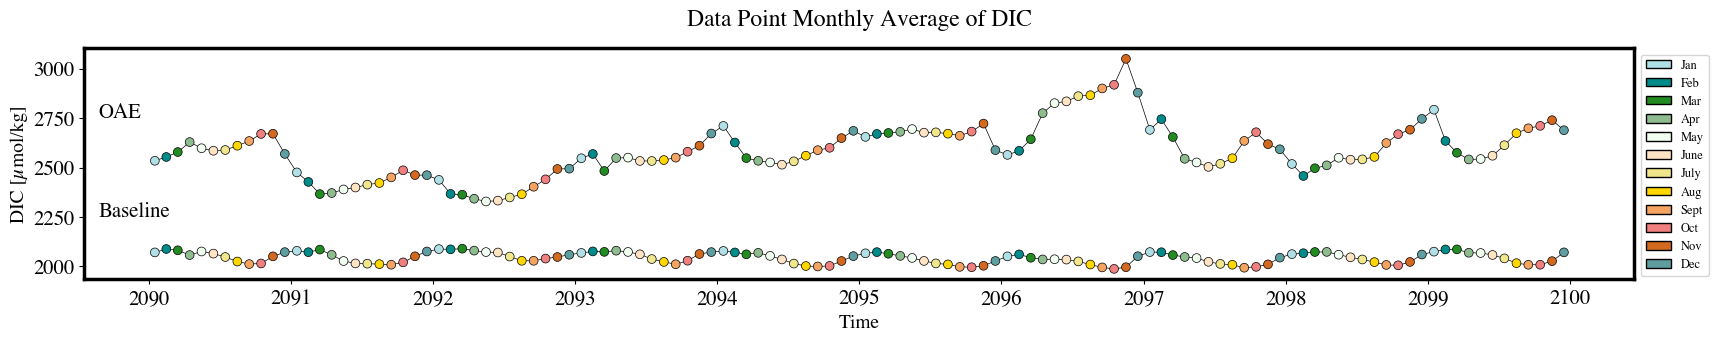

In [190]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2250, s='Baseline')
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2750, s='OAE')
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.DIC, color=dic_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of DIC", fontsize=17, y=1.06)

pass

### Δ DIC between Baseline and OAE from 2090 to 2100

In [191]:
delta_dic = dic_oae_monthly.DIC - dic_baseline_monthly.DIC

In [192]:
delta_dic = delta_dic.to_xarray()

In [193]:
delta_dic = delta_dic.to_dataframe('dic')
delta_dic['Month'] = pd.DatetimeIndex(delta_dic.index).month

In [194]:
conditions = [
    (delta_dic['Month'] == 1),
    (delta_dic['Month'] == 2),
    (delta_dic['Month'] == 3),
    (delta_dic['Month'] == 4),
    (delta_dic['Month'] == 5),
    (delta_dic['Month'] == 6),
    (delta_dic['Month'] == 7),
    (delta_dic['Month'] == 8),
    (delta_dic['Month'] == 9),
    (delta_dic['Month'] == 10),
    (delta_dic['Month'] == 11),
    (delta_dic['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_dic['Month'] = np.select(conditions, values)

In [195]:
colors = dict(zip(delta_dic.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

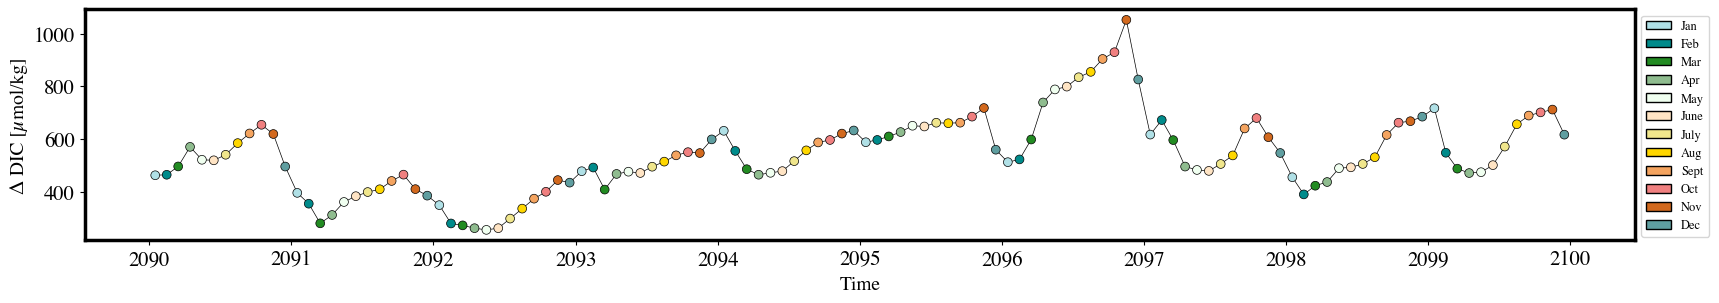

In [196]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_dic.index, delta_dic.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC [µmol/kg]', fontsize=14)
#ax.set_title("Δ DIC between Baseline and OAE", fontname="Times", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/DIC/figs/DPΔDIC_monthly_mean.png')

pass

### Averaged monthly cycle of Δ DIC

In [197]:
delta_dic_mean = delta_dic.groupby(delta_dic.index.month).dic.mean()
delta_dic_mean = delta_dic_mean.reset_index()
delta_dic_mean['time_counter'] = delta_dic_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [198]:
colors = dict(zip(delta_dic_mean.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

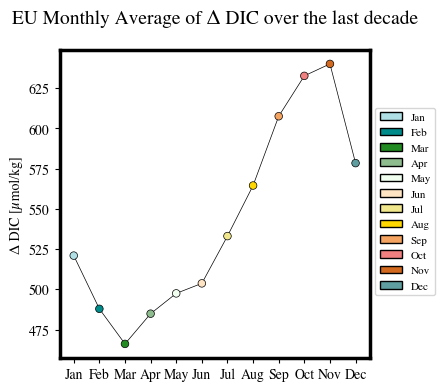

In [199]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_dic_mean.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic_mean.time_counter, delta_dic_mean.dic, color=delta_dic_mean.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
ax.set_ylabel('Δ DIC [µmol/kg]', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("EU Monthly Average of Δ DIC over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### Data Point Monthly Averaged DIC for the last 10 years

In [200]:
mean_baseline = (sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).DIC.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [201]:
mean_oae = (sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).DIC.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

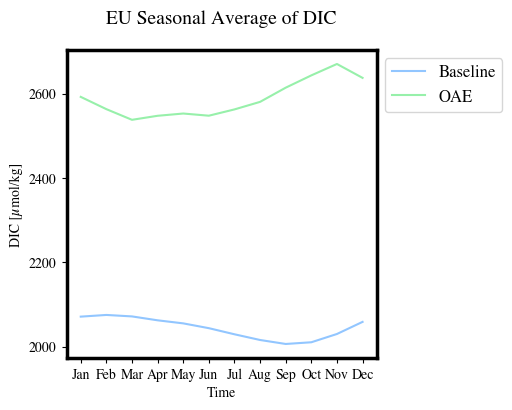

In [202]:
plt.figure(figsize=(4,4))
plt.plot(mean_baseline.DIC, label='Baseline')
plt.plot(mean_oae.DIC, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("DIC [µmol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Times")
plt.yticks(fontsize=10, fontname="Times")
plt.title('EU Seasonal Average of DIC', fontname="Times", fontsize=14, y=1.06)
plt.show()

### Averaged monthly cycle of DIC

In [203]:
mean_baseline = mean_baseline.reset_index()
mean_oae = mean_oae.reset_index()

In [204]:
colors = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [205]:
colors = dict(zip(mean_oae.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

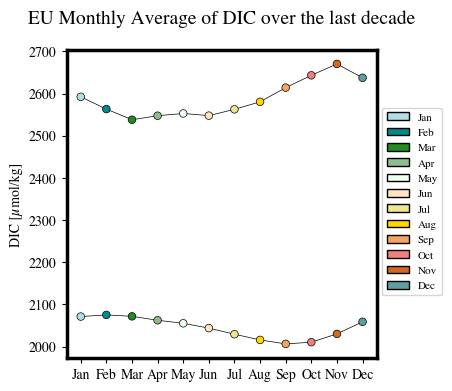

In [206]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.DIC, color=mean_baseline.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.DIC, color=mean_oae.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
ax.set_ylabel('DIC [µmol/kg]', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("EU Monthly Average of DIC over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

In [207]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

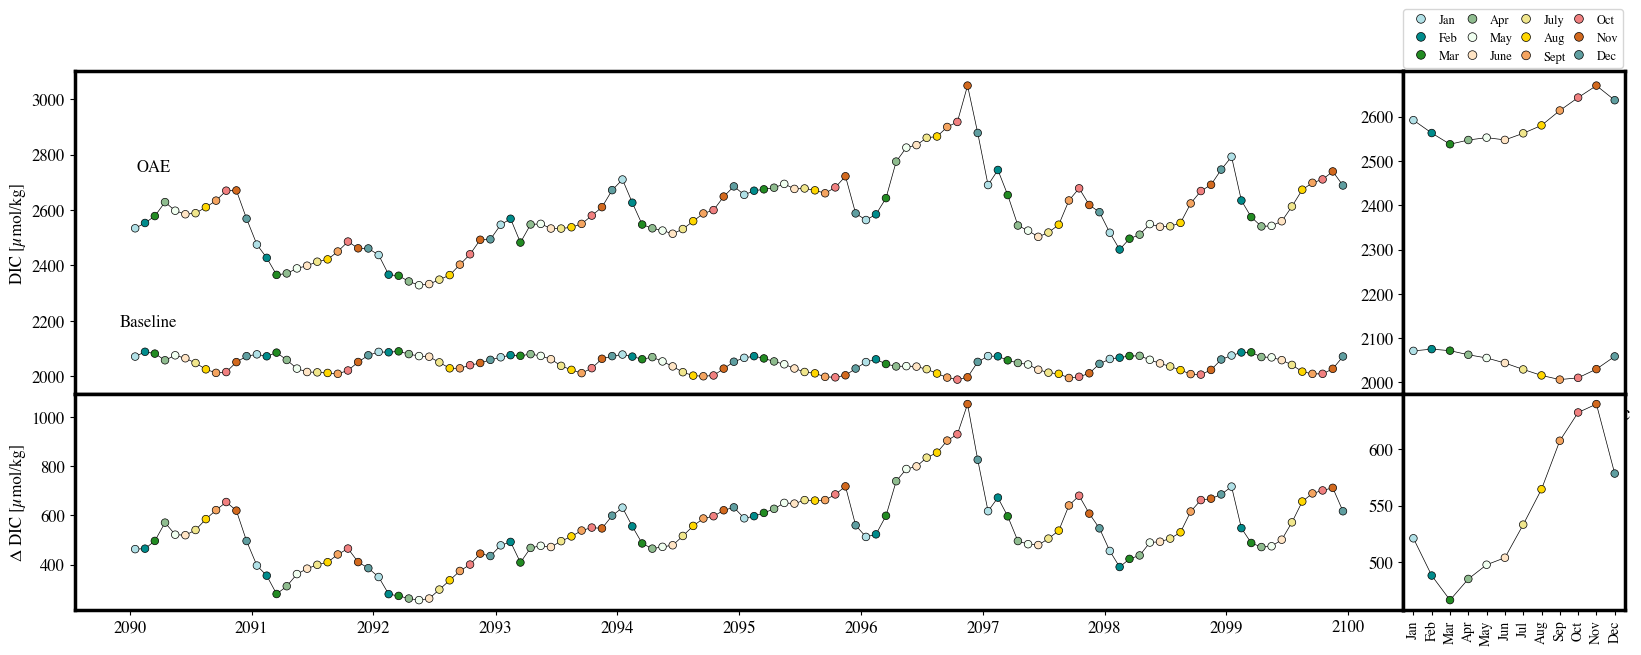

In [208]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors2 = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors3 = dict(zip(mean_oae.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))


f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey=False) 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.text(43800, 2180, s='Baseline', fontsize=12)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.DIC, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43850, 2740, s='OAE', fontsize=12)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.DIC, color=dic_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('DIC [µmol/kg]', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, 
          handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.DIC, color=mean_baseline.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.DIC, color=mean_oae.time_counter.map(lambda x: colors3[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='y', which='major', labelsize=12)

colors = dict(zip(delta_dic.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors2 = dict(zip(delta_dic_mean.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

ax3.plot_date(delta_dic.index, delta_dic.dic, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Δ DIC [µmol/kg]', fontsize=12)

ax4.plot(delta_dic_mean.dic, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_dic_mean.time_counter, delta_dic_mean.dic, color=delta_dic_mean.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax4.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax4.tick_params(axis='y', which='major', labelsize=12)

yticks = ax2.yaxis.get_major_ticks()
yticks[-2].label1.set_visible(False)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/DIC/figs/DPDIC_monthly_mean.png')

pass

In [211]:
summary_maxmin = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_minmax_dp.csv', header=[0,1], index_col=0)

In [215]:
summary_maxmin.loc['DIC', ('Without OAE','Max')] = round(mean_baseline.DIC.max())
summary_maxmin.loc['DIC', ('Without OAE','Min')] = round(mean_baseline.DIC.min())

In [216]:
summary_maxmin.loc['DIC', ('With OAE','Max')] = round(mean_oae.DIC.max())
summary_maxmin.loc['DIC', ('With OAE','Min')] = round(mean_oae.DIC.min())

In [217]:
summary_maxmin.to_csv('../Summary_minmax_dp.csv')

### DIC over Depth

In [218]:
depth_baseline_frame = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))
depth_oae_frame = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [219]:
depth_baseline_frame = depth_baseline_frame.DIC.mean(dim=('y', 'x', 'time_counter'))
depth_oae_frame = depth_oae_frame.DIC.mean(dim=('y', 'x', 'time_counter'))

In [220]:
depth_baseline_frame = depth_baseline_frame.to_dataset()
depth_oae_frame = depth_oae_frame.to_dataset()

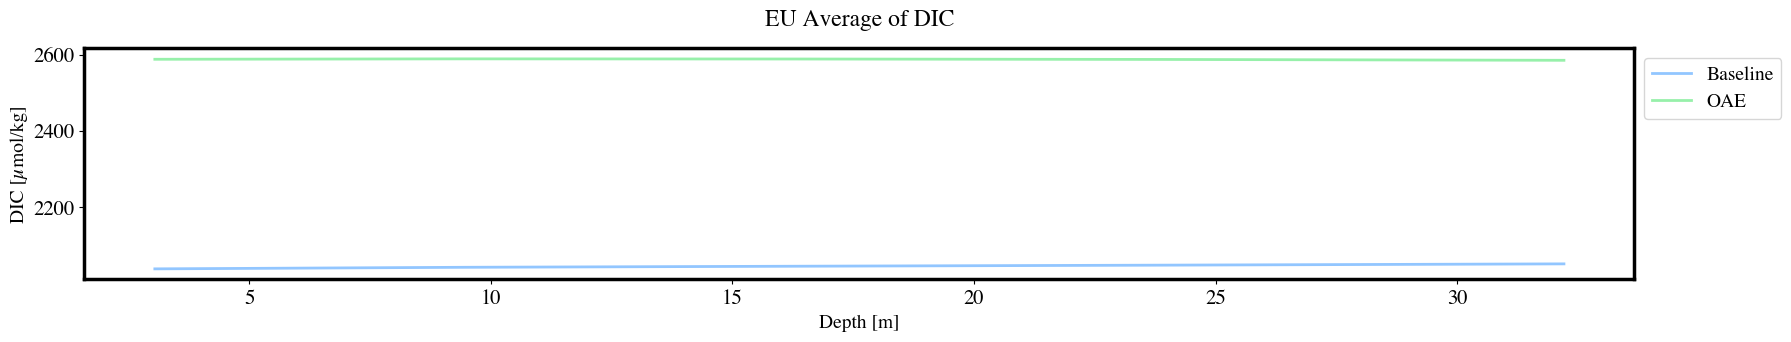

In [221]:
plt.figure(figsize=(20, 3))
plt.plot(depth_baseline_frame.deptht, depth_baseline_frame.DIC, linewidth=2, label = 'Baseline')
plt.plot(depth_oae_frame.deptht, depth_oae_frame.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Depth [m]", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontsize=17, y=1.06)
plt.show()

In [238]:
summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_amplitude.csv', header=[0,1], index_col=0)

In [239]:
summary_amplitude.loc['DIC', ('Location Point','With OAE')] = round(mean_oae.DIC.max() - mean_oae.DIC.min())

In [240]:
summary_amplitude.loc['DIC', ('Location Point','Without OAE')] = round(mean_baseline.DIC.max() - mean_baseline.DIC.min())

In [241]:
summary_amplitude.to_csv('../Summary_amplitude.csv')

In [234]:
summary_maxmin = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_minmax_dp.csv', header=[0,1], index_col=0)

In [235]:
summary_maxmin.loc['DIC', ('Without OAE','Max')] = round(mean_baseline.DIC.max())
summary_maxmin.loc['DIC', ('Without OAE','Min')] = round(mean_baseline.DIC.min())

In [236]:
summary_maxmin.loc['DIC', ('With OAE','Max')] = round(mean_oae.DIC.max())
summary_maxmin.loc['DIC', ('With OAE','Min')] = round(mean_oae.DIC.min())

In [237]:
summary_maxmin.to_csv('../Summary_minmax_dp.csv')